# Support Vector Machines(SVM)

##### SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.

In [100]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris= load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df['target']= iris.target

In [15]:
df.head(

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [23]:
# 0 means setosa
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
# 1 means versicolor
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [25]:
# 2 means virginica
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [31]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])

In [32]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [33]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


## Visualizing the Data

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

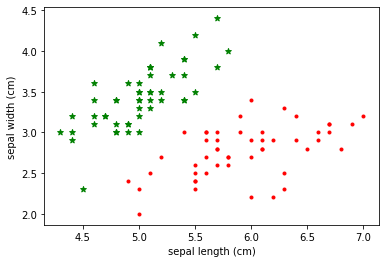

In [48]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='g', marker='*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='r', marker='.')


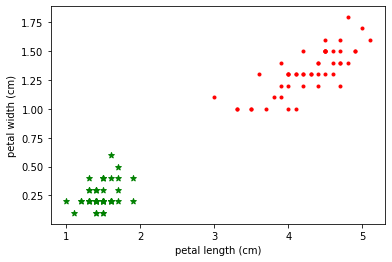

In [49]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='g', marker='*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='r', marker='.')


## Splitting Data

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
x=df.drop(['target', 'flower_names'], axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [56]:
x_train,x_test, y_train, y_test  = train_test_split(x,y,train_size=0.8)

In [57]:
len(x_train)

120

In [58]:
len(x_test)

30

## Training the Algorithm
#### SVM KERNELS
The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

In [61]:
from sklearn.svm import SVC

In [99]:
model= SVC(kernel='linear')

In [88]:
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Making Predictions
Predict the response fot test dataset.

In [85]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 0])

## Evaluating the Model
 Accuracy can be computed by comparing actual test set values and predicted values.

In [75]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [89]:
metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

In [82]:
model.score(x_test, y_test)

0.9333333333333333

#### The model accuracy_score is 93.3%.

# Model without kernel 

In [96]:
model1= SVC()
model1.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [97]:
y_pred1=model1.predict(x_test)
y_pred1

array([2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1,
       1, 1, 0, 2, 1, 2, 2, 0])

In [98]:
model1.score(x_test, y_test)

0.9666666666666667

#### Now the model accuracy score is 96.7%, considered as very good accuracy.